In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm


In [2]:
# Cargar los datos
data = pd.read_csv('../datos/most-spotify-2024.csv', encoding='latin1')
data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


In [3]:


# Exploración básica del dataset
print("Primeras filas del dataset:")
print(data.head())

print("\nColumnas del dataset:")
print(data.columns.tolist())

print("\nConteo de valores por columna:")
print(data.count())

print("\nDescripción estadística de las variables numéricas:")
print(data.describe())

print("\nCantidad de valores nulos por columna:")
print(data.isna().sum().sort_values(ascending=False).head(20))

Primeras filas del dataset:
                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1     5/4/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398             5        423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist Reac

In [4]:
# Mostrar estadísticos descriptivos
print(data.describe().T)

# Mostrar las columnas del DataFrame
print("Columnas del DataFrame:", data.columns.tolist())

# Contar ocurrencias por artista
print("Cantidad de canciones por artista:")
print(data['Artist'].value_counts())

# Crear copia del DataFrame
data2 = data.copy()

# Revisar duplicados
num_duplicados = data2.duplicated(subset=['Track', 'Artist']).sum()
print(f"Número de duplicados por Track y Artist: {num_duplicados}")

# Eliminar duplicados
data2 = data2.drop_duplicates(subset=['Track', 'Artist'])

# Revisar valores faltantes
print("Valores faltantes por columna:")
print(data2.isna().sum().sort_values(ascending=False))

# Columnas a eliminar
cols_drop = [
    'TIDAL Popularity',
    'Soundcloud Streams',
    'SiriusXM Spins',
    'Pandora Track Stations',
    'Amazon Playlist Count',
    'Deezer Playlist Count',
    'Deezer Playlist Reach',
    'YouTube Playlist Reach'
]

data2 = data2.drop(columns=cols_drop)

# Columnas esenciales para análisis
essential_columns = [
    'Spotify Streams',
    'YouTube Views',
    'YouTube Likes',
    'TikTok Posts',
    'TikTok Likes',
    'TikTok Views',
    'Track Score',
    'All Time Rank'
]

# Eliminar filas con NaN en columnas esenciales
data2 = data2.dropna(subset=essential_columns)

# Mostrar resumen final
print("Datos después de limpieza:")
print(data2.info())

                             count       mean        std   min   25%   50%  \
Track Score                 4600.0  41.844043  38.543766  19.4  23.3  29.9   
Spotify Popularity          3796.0  63.501581  16.186438   1.0  61.0  67.0   
Apple Music Playlist Count  4039.0  54.603120  71.612270   1.0  10.0  28.0   
Deezer Playlist Count       3679.0  32.310954  54.274538   1.0   5.0  15.0   
Amazon Playlist Count       3545.0  25.348942  25.989826   1.0   8.0  17.0   
TIDAL Popularity               0.0        NaN        NaN   NaN   NaN   NaN   
Explicit Track              4600.0   0.358913   0.479734   0.0   0.0   0.0   

                               75%    max  
Track Score                 44.425  725.4  
Spotify Popularity          73.000   96.0  
Apple Music Playlist Count  70.000  859.0  
Deezer Playlist Count       37.000  632.0  
Amazon Playlist Count       34.000  210.0  
TIDAL Popularity               NaN    NaN  
Explicit Track               1.000    1.0  
Columnas del DataFrame:

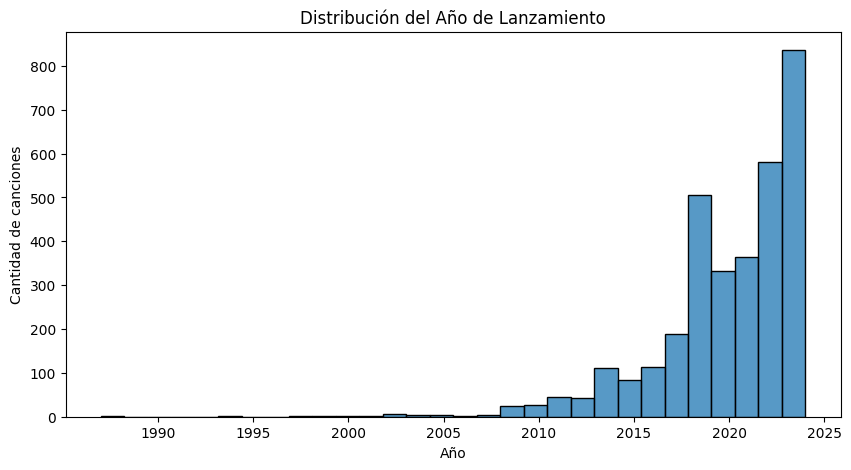

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                         object
Track Score                          float64
Spotify Streams                       object
Spotify Playlist Count                object
Spotify Playlist Reach                object
Spotify Popularity                   float64
YouTube Views                         object
YouTube Likes                         object
TikTok Posts                          object
TikTok Likes                          object
TikTok Views                          object
Apple Music Playlist Count           float64
AirPlay Spins                         object
Pandora Streams                       object
Shazam Counts                         object
Explicit Track                         int64
Num_Artists                            int64
Release Ye

In [5]:
# 1. Calcular número de artistas
# La columna "Artist" contiene nombres separados por coma.
# Convertimos cada valor a string, lo dividimos y contamos cuántos artistas hay.
data2['Num_Artists'] = data2['Artist'].apply(lambda x: len(str(x).split(',')))

# Frecuencia de aparición de artistas
data2['Artist'].value_counts()

# Frecuencia del número de artistas por canción
data2['Num_Artists'].value_counts()

# Máximo número de artistas en una sola canción
data2['Num_Artists'].max()


# 2. Manejo de fechas

# Convertir la fecha a tipo datetime
data2["Release Date"] = pd.to_datetime(data2["Release Date"], errors="coerce")

# Extraer año de lanzamiento
data2["Release Year"] = data2["Release Date"].dt.year

# Extraer mes de lanzamiento
data2["Release Month"] = data2["Release Date"].dt.month


# 3. Histograma del año de lanzamiento
plt.figure(figsize=(10, 5))
sns.histplot(data2["Release Year"], bins=30, kde=False)
plt.title("Distribución del Año de Lanzamiento")
plt.xlabel("Año")
plt.ylabel("Cantidad de canciones")
plt.show()


# 4. Convertir valor explícito a numérico

# Convertimos TRUE/FALSE a 1/0 sin importar el formato
data2["Explicit Track"] = (
    data2["Explicit Track"]
    .map({"TRUE": 1, "FALSE": 0, True: 1, False: 0})
    .fillna(0)
    .astype(int)
)


# 5. Mostrar tipos de datos finales

data2.dtypes

In [6]:
#lista de columnas a convertir a formato numérico
cols_to_fix = [
    'Spotify Streams','Spotify Playlist Count','Spotify Playlist Reach',
    'YouTube Views','YouTube Likes','TikTok Posts','TikTok Likes','TikTok Views',
    'AirPlay Spins','Pandora Streams','Shazam Counts','All Time Rank'
]

# Convertir columnas a formato numérico, eliminando comas y manejando errores
for col in cols_to_fix:
    if col in data2.columns:
        data2[col] = pd.to_numeric(data2[col].astype(str).str.replace(",", "", regex=False), errors='coerce')

# Rellenar valores nulos en columnas numéricas con la mediana de cada columna
num_cols = data2.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols)>0:
    data2[num_cols] = data2[num_cols].fillna(data2[num_cols].median())

In [7]:
num_cols = data2.select_dtypes(include=[np.number]).columns
data2[num_cols] = data2[num_cols].fillna(0)

#Muestra la cantidad de canciones explicitas y no explicitas
print(data2['Explicit Track'].value_counts())

#promedio de streams por si es explicita o no
print(data2.groupby('Explicit Track')['Spotify Streams'].mean())

Explicit Track
0    2029
1    1253
Name: count, dtype: int64
Explicit Track
0    5.369180e+08
1    5.062229e+08
Name: Spotify Streams, dtype: float64


In [8]:
#Seleccion de variable para el modelo
features = [
    'Spotify Playlist Count',
    'Spotify Playlist Reach',
    'Spotify Popularity',
    'YouTube Views',
    'YouTube Likes',
    'TikTok Views',
    'TikTok Likes',
    'Shazam Counts',
    'Track Score',
    'All Time Rank',
    'Release Year',
    'Spotify Streams'
]


#Variable objetivo
target = 'Explicit Track'

In [9]:
df = data2.copy()

#Convertir a formato numérico y eliminar filas con valores nulos
df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df[target] = pd.to_numeric(df[target], errors='coerce')

#unimos las variables predictivas y variable objetivo
df_data_para_separar = pd.concat([df[features], df[target]], axis=1)
df_data_para_separar = df_data_para_separar.dropna()

In [10]:
#Estandarizacion de los datos
scaler = StandardScaler()

#inecesaria X_scaled = scaler.fit_transform(X)

#separacia predictoras y objetivo
X = df_data_para_separar[features]
y = df_data_para_separar[target]

In [ ]:
# División de los datos en conjunto de entrenamiento y prueba 
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify= y
)

X_train_rev = scaler.fit_transform(X_train_rev)
X_test_rev = scaler.transform(X_test_rev)

In [13]:
#Creacion del modelo
modelo_logistico = LogisticRegression(solver='liblinear', random_state=42)

In [14]:
#Entrenamiento del modelo
modelo_logistico.fit(X_train_rev, y_train_rev)

#Crea la prediccion el modelo
y_predicted = modelo_logistico.predict(X_test_rev)

#Calcula la exactitud del modelo
accuracy_score(y_test_rev, y_predicted)

0.7065989847715736

In [15]:
#matriz de confusion
confusion_matrix(y_test_rev, y_predicted)

#Matriz de clasificación
print(classification_report(y_test_rev, y_predicted, target_names=['No Explicita','Explicita']))

              precision    recall  f1-score   support

No Explicita       0.70      0.91      0.79       609
   Explicita       0.72      0.38      0.50       376

    accuracy                           0.71       985
   macro avg       0.71      0.64      0.64       985
weighted avg       0.71      0.71      0.68       985



In [16]:
#Reporte de clasificación
coeficientes = pd.Series(modelo_logistico.coef_[0], index = X.columns)

In [17]:
print(coeficientes.sort_values(ascending=False))

Spotify Playlist Count    1.375133
TikTok Likes              0.633647
Track Score               0.316812
Release Year              0.211751
All Time Rank            -0.020828
YouTube Likes            -0.073213
Spotify Popularity       -0.126306
Shazam Counts            -0.375249
Spotify Playlist Reach   -0.414704
YouTube Views            -0.429141
Spotify Streams          -0.463658
TikTok Views             -0.901693
dtype: float64


<Axes: >

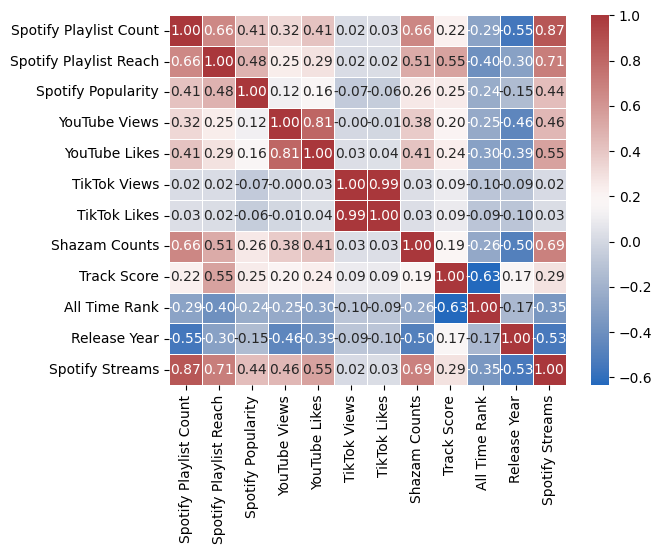

In [18]:
data_correlacion = pd.DataFrame(X_train_rev, columns= X.columns)

matriz_correlacion = data_correlacion.corr(method='pearson')

sns.heatmap(
    matriz_correlacion,
    annot = True,
    fmt = ".2f",
    cmap='vlag',
    linewidths=.5,
    cbar = True,
)